In [2]:
from numpy import load
import matplotlib.pyplot as plt
import numpy as np

folder = "dumper8/"#"experiment39/"

hmc_av_accept_probs   = load(folder + "HMC_AP.npy")
rmhmc_av_accept_probs = load(folder + "RMHMC_AP.npy")
chmc_av_accept_probs  = load(folder + "CHMC_AP.npy")
hug_av_accept_probs   = load(folder + "HUG_AP.npy")
thug_av_accept_probs  = load(folder + "THUG_AP.npy")
hug_av_accept_probsL  = load(folder + "HUGL_AP.npy")
thug_av_accept_probsL = load(folder + "THUGL_AP.npy")
hmc_av_accept_probsL  = load("experiment39/" + "HMC-L.npy")
σ_grid                = load(folder + "SIGMA_GRID.npy")
ϵ_grid                = load(folder + "EPSILON_GRID.npy")
αs                    = load(folder + "ALPHAS.npy")

In [11]:
def plot_statistic_heatmap(
        σ_grid, ϵ_grid, statistic_grid, ax=None, title=None, colorbar=True, return_artist=False, shrink=1.0):
    fig, ax = create_fig_if_none(ax, figsize=(5, 4))
    artist = ax.imshow(statistic_grid.T, vmin=0, vmax=1, origin='lower')
    ax.set(xlabel='$\sigma$', 
           ylabel='$\delta$',
           title=title, aspect=1, 
           xticks=np.arange(σ_grid.shape[0])[::2],
           xticklabels=[f'$10^{{{int(i)}}}$' for i in np.log10(σ_grid[::2])],
           yticks=np.arange(ϵ_grid.shape[0])[::2], 
           yticklabels=[f'$10^{{{int(i)}}}$' for i in np.log10(ϵ_grid[::2])])
    if colorbar:
        fig.colorbar(artist, ax=fig.axes, shrink=shrink)
    if return_artist:
        return fig, ax, artist
    else:
        return fig, ax

def create_fig_if_none(ax, **fig_kw):
    if ax is None:
        fig, ax = plt.subplots(**fig_kw)
    else:
        fig = ax.figure
    return fig, ax

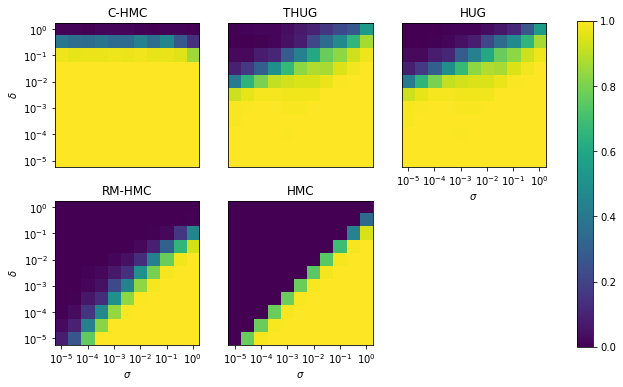

In [213]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(11, 6))
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, chmc_av_accept_probs, title='C-HMC', ax=ax[0, 0])
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, thug_av_accept_probs, title='THUG', ax=ax[0, 1], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hug_av_accept_probs, title='HUG', ax=ax[0, 2], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, rmhmc_av_accept_probs, title='RM-HMC', ax=ax[1, 0], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hmc_av_accept_probs, title='HMC', ax=ax[1, 1], colorbar=False)
ax[0, 0].set_xticks([])
ax[0, 0].set_xlabel("")
ax[0, 1].set_xticks([])
ax[0, 1].set_xlabel("")
ax[0, 1].set_yticks([])
ax[0, 1].set_ylabel("")
ax[0, 2].set_yticks([])
ax[0, 2].set_ylabel("")
ax[1, 1].set_yticks([])
ax[1, 1].set_ylabel("")
ax[1, 2].set_visible(False)
plt.savefig("figures/bip_true_posterior.png", dpi=100)
plt.show()

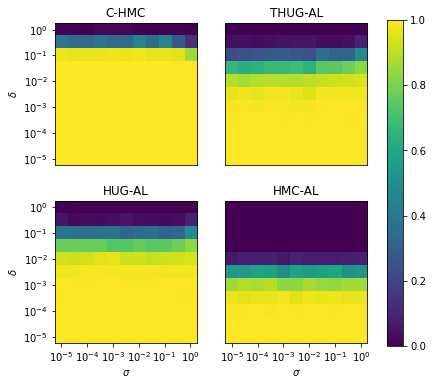

In [205]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 6))

_ = plot_statistic_heatmap(σ_grid, ϵ_grid, chmc_av_accept_probs, title='C-HMC', ax=ax[0, 0])
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, thug_av_accept_probsL, title='THUG-AL', ax=ax[0, 1], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hug_av_accept_probsL, title='HUG-AL', ax=ax[1, 0], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hmc_av_accept_probsL, title='HMC-AL', ax=ax[1, 1], colorbar=False)
ax[0, 0].set_xticks([])
ax[0, 0].set_xlabel("")
ax[0, 1].set_xticks([])
ax[0, 1].set_xlabel("")
ax[0, 1].set_yticks([])
ax[0, 1].set_ylabel("")
ax[1, 1].set_yticks([])
ax[1, 1].set_ylabel("")
plt.savefig("figures/bip_approx_lifted.png", dpi=100)
plt.show()

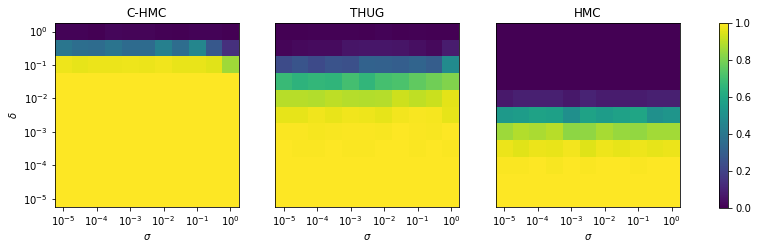

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

_ = plot_statistic_heatmap(σ_grid, ϵ_grid, chmc_av_accept_probs, title='C-HMC', ax=ax[0], shrink=0.68)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, thug_av_accept_probsL, title='THUG', ax=ax[1], colorbar=False)
_ = plot_statistic_heatmap(σ_grid, ϵ_grid, hmc_av_accept_probsL, title='HMC', ax=ax[2], colorbar=False)
# ax[0].set_xticks([])
# ax[0].set_xlabel("")
# ax[1].set_xticks([])
# ax[1].set_xlabel("")
ax[1].set_yticks([])
ax[1].set_ylabel("")
ax[2].set_yticks([])
ax[2].set_ylabel("")
plt.savefig("figures/bip_approx_lifted_poster.png", dpi=500)
plt.show()

In [209]:
thug_av_accept_probs[:, -1] * 100

array([ 0. ,  0.6,  0.8,  1.8,  4. ,  7.4,  8.2, 15. , 14.6, 26.4, 55.4])

In [210]:
hug_av_accept_probs[:, -1] * 100

array([ 0. ,  0.2,  0. ,  0.4,  0.2,  2.6,  1.8,  7.2, 14.6, 26.4, 55.4])

In [214]:
thug_av_accept_probs[:, -1] * 100

array([ 0.4,  1. ,  1.6,  1.4,  3.6,  7.2, 10. , 16.2, 22.4, 27. , 54.4])

In [216]:
thug_av_accept_probs[0, :] *100

array([100. , 100. , 100. ,  99.2,  99.2,  92.2,  41.4,   8.8,   2.6,
         0.2,   0.4])

In [217]:
hug_av_accept_probs[0, :] *100

array([100. , 100. , 100. ,  99.2,  99.2,  92.2,  41.4,   8.8,   2.6,
         0.2,   0. ])

In [218]:
rmhmc_av_accept_probs[0, :] * 100

array([7.9999653 , 2.79997136, 0.39999084, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])